✅ Datos cargados desde MongoDB correctamente.
📊 Total de registros: 2834

Vista previa:
  id_visitante pais_origen  edad genero               destino   region  \
0        V0001      Brasil    59      F          Río Amazonas  Iquitos   
1        V0002    Colombia    17      M  Islas Flotantes Uros     Puno   
2        V0003   Argentina    25   Otro        Huaca Pucllana     Lima   
3        V0004    Colombia    38      F          Sacsayhuamán    Cusco   
4        V0005   Argentina    56   Otro  Parque de la Reserva     Lima   

  fecha_visita  dias_estadia  gasto_total medio_transporte  
0   2025-01-10            12      3474.65      Desconocido  
1   2025-09-15            11       890.28      Desconocido  
2   2025-05-01             3      3565.26             Auto  
3   2025-07-05            13       853.63         Mototaxi  
4   2025-08-04            11       360.77             Auto  


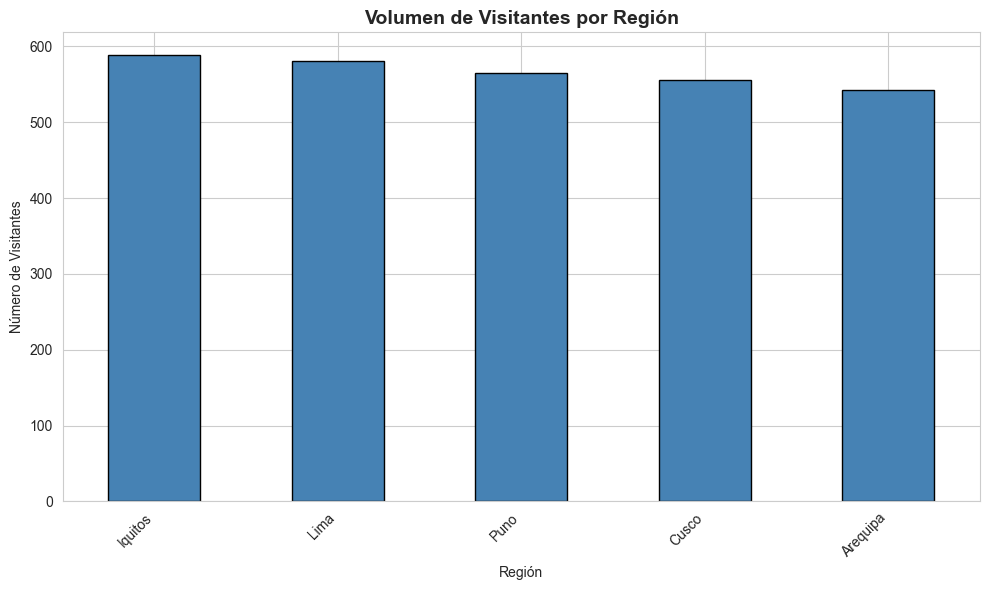

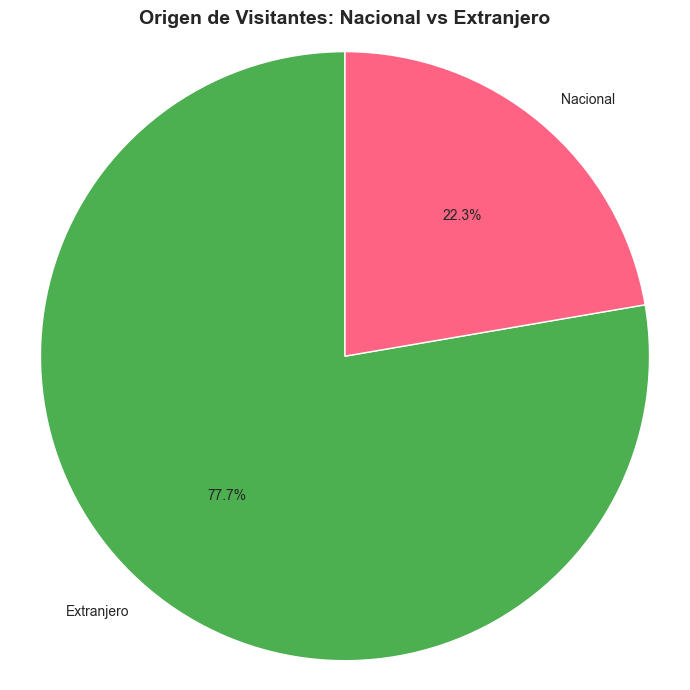

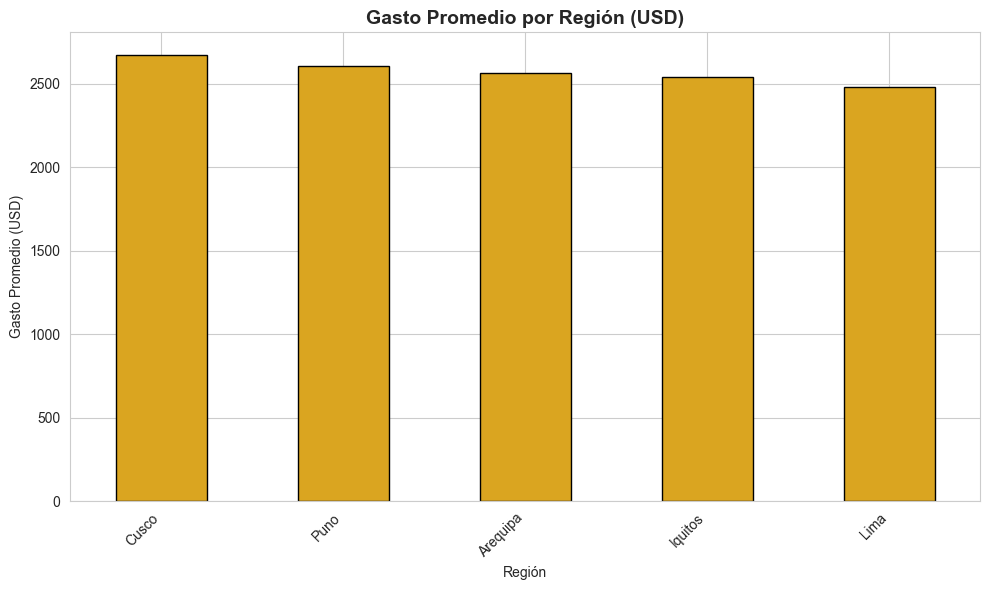

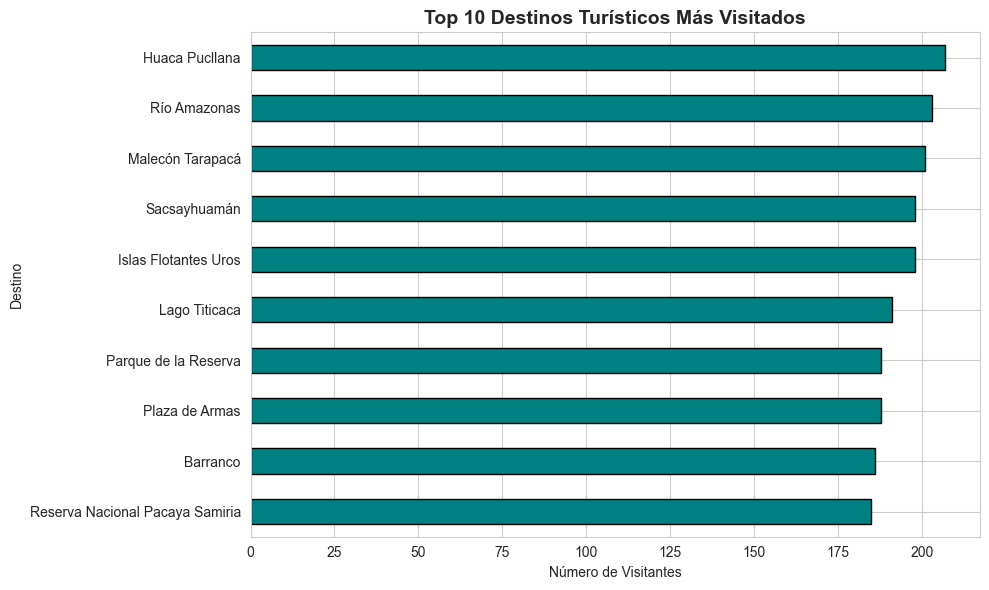

d:\AcutalCiclo\Topicos en sistemas inteligentes\TurismoDigitalB_E1Yoel\myenv\Lib\site-packages\matplotlib\collections.py:1112: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "
C:\Users\ayoel\AppData\Local\Temp\ipykernel_24256\515572530.py:101: UserWarning: Mismatched number of handles and labels: len(handles) = 0 len(labels) = 2
  plt.legend(handles=scatter.legend_elements()[0], labels=["Nacional", "Extranjero"])
C:\Users\ayoel\AppData\Local\Temp\ipykernel_24256\515572530.py:101: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(handles=scatter.legend_elements()[0], labels=["Nacional", "Extranjero"])


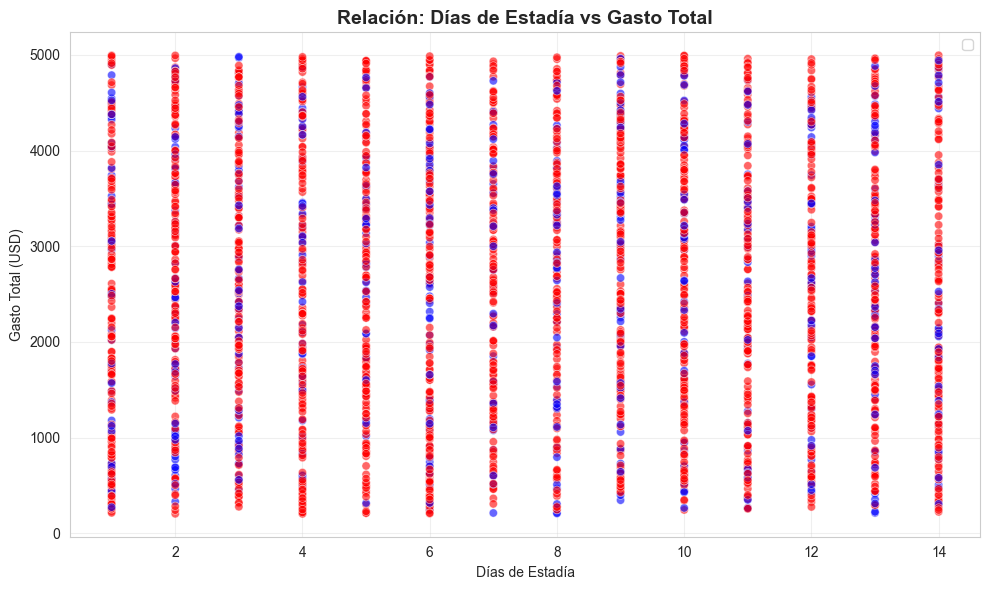


✅ Todos los reportes guardados en: d:\AcutalCiclo\Topicos en sistemas inteligentes\TurismoDigitalB_E1Yoel\reports


In [3]:
## 🧰 1️⃣ Librerías necesarias
# Asegúrate de tenerlas instaladas en tu entorno virtual:
# pip install pandas matplotlib pymongo

import pandas as pd
from pymongo import MongoClient
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Configuración visual
plt.rcParams.update({'font.size': 10})
sns.set_style("whitegrid")

# 🔹 Conectar a MongoDB y cargar datos
client = MongoClient("mongodb://localhost:27017/")
db = client["TurismoPeru_2025"]
collection = db["Visitantes"]

# Cargar todos los documentos (sin _id)
data = list(collection.find({}, {"_id": 0}))
df = pd.DataFrame(data)

print("✅ Datos cargados desde MongoDB correctamente.")
print(f"📊 Total de registros: {len(df)}\n")
print("Vista previa:")
print(df.head())

# 🔹 Crear carpeta 'reports' (hermana de 'scripts')
reports_path = Path.cwd().parent / "reports"
reports_path.mkdir(parents=True, exist_ok=True)

# ==============================================================================
# 📊 VISUALIZACIONES SEGÚN LOS OBJETIVOS DEL EXAMEN
# ==============================================================================

### 🗺️ 1. Volumen de visitantes por región
plt.figure(figsize=(10, 6))
region_counts = df["region"].value_counts()
region_counts.plot(kind="bar", color="steelblue", edgecolor="black")
plt.title("Volumen de Visitantes por Región", fontsize=14, weight="bold")
plt.xlabel("Región")
plt.ylabel("Número de Visitantes")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig(reports_path / "Visitantes_por_Región.png", dpi=300)
plt.show()

### 🌍 2. Origen de visitantes: Nacional vs Extranjero
df["origen_tipo"] = df["pais_origen"].apply(lambda x: "Nacional" if x == "Perú" else "Extranjero")
origen_counts = df["origen_tipo"].value_counts()

plt.figure(figsize=(7, 7))
colors = ["#4CAF50", "#FF6384"]
plt.pie(origen_counts, labels=origen_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Origen de Visitantes: Nacional vs Extranjero", fontsize=14, weight="bold")
plt.axis("equal")
plt.tight_layout()
plt.savefig(reports_path / "Visitantes_por_País_de_Origen.png", dpi=300)
plt.show()

### 💵 3. Gasto promedio por región
gasto_por_region = df.groupby("region")["gasto_total"].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
gasto_por_region.plot(kind="bar", color="goldenrod", edgecolor="black")
plt.title("Gasto Promedio por Región (USD)", fontsize=14, weight="bold")
plt.xlabel("Región")
plt.ylabel("Gasto Promedio (USD)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig(reports_path / "Gasto_Promedio_por_Región.png", dpi=300)
plt.show()

### 🏞️ 4. Preferencias turísticas: Destinos más visitados
top_destinos = df["destino"].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_destinos.plot(kind="barh", color="teal", edgecolor="black")
plt.title("Top 10 Destinos Turísticos Más Visitados", fontsize=14, weight="bold")
plt.xlabel("Número de Visitantes")
plt.ylabel("Destino")
plt.gca().invert_yaxis()  # Más visitado arriba
plt.tight_layout()
plt.savefig(reports_path / "Preferencias_Turisticas_Destinos.png", dpi=300)
plt.show()

### 🔥 DESAFÍO EXTRA: Relación entre días de estadía y gasto total
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    df["dias_estadia"],
    df["gasto_total"],
    c=df["origen_tipo"].map({"Nacional": "blue", "Extranjero": "red"}),
    alpha=0.6,
    edgecolors="w",
    linewidth=0.5
)
plt.title("Relación: Días de Estadía vs Gasto Total", fontsize=14, weight="bold")
plt.xlabel("Días de Estadía")
plt.ylabel("Gasto Total (USD)")
plt.legend(handles=scatter.legend_elements()[0], labels=["Nacional", "Extranjero"])
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(reports_path / "Dias_vs_Gasto_por_Origen.png", dpi=300)
plt.show()

print(f"\n✅ Todos los reportes guardados en: {reports_path}")
